### 1 Задание

In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.pyplot import figure

### Считывание файла

In [224]:
#Ссылка для скачивания датасета https://www.kaggle.com/datasets/ibrahimonmars/global-cargo-ships-dataset?resource=download&select=Cleaned_ships_data.csv
file_path = 'C:/Users/Mi/Downloads/archive (2)/Cleaned_ships_data.csv'
if '.csv' in file_path and os.path.exists(file_path) == True:    
    data = pd.read_csv(file_path)
    if not(os.path.getsize(file_path) > 0 and data.isnull().values.any()):
        print(data.head(5))
    else:
        print('Походу, файл битый')
else:
    print('Файла не существует или он другого формата')


  Company_Name                ship_name  built_year      gt     dwt  length  \
0      PRELUDE  Offshore Support Vessel        2017  499167  394330     489   
1   MSC LORETO           Container Ship        2023  236184  240000     399   
2     MSC FEBE           Container Ship        2019  232618  228149     400   
3    MSC ARINA           Container Ship        2019  228741  228111     400   
4  EVER GOVERN           Container Ship        2019  219688  198937     400   

   width  
0     74  
1     60  
2     62  
3     61  
4     59  


### 2-D график зависимости грузоподъемности (dwt) от длины (length)

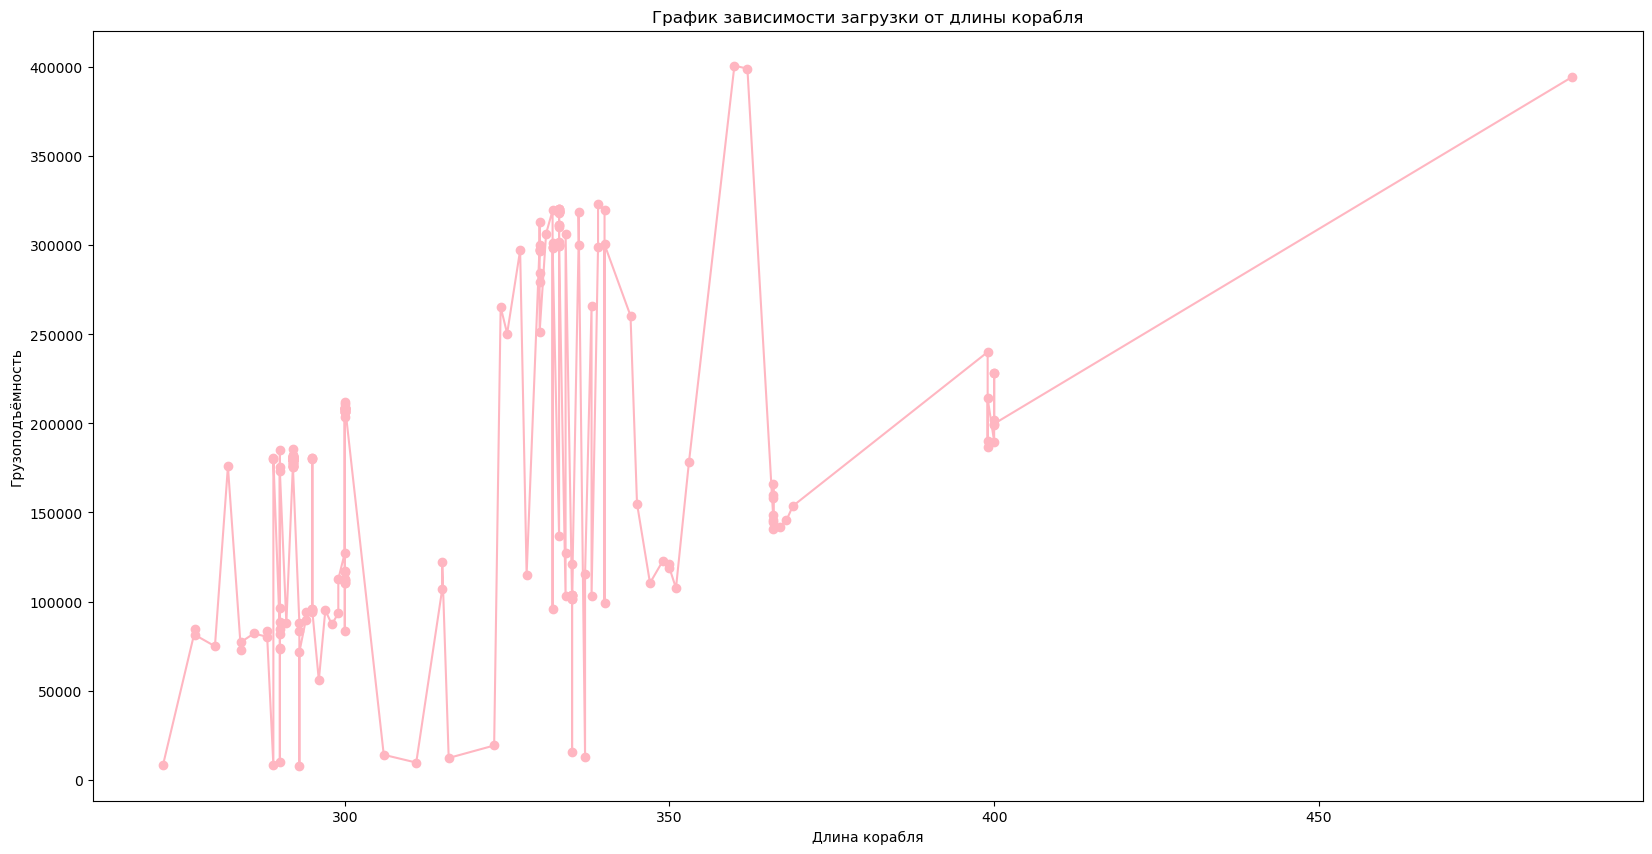

In [225]:
#sns.set_palette(sns.color_palette('inferno', n_colors=10))
plt.figure(figsize=(20, 10))
plt.xlabel('Длина корабля')
plt.ylabel('Грузоподъёмность')
plt.title('График зависимости загрузки от длины корабля')
sorted_data = data.sort_values('length')
plt.plot(sorted_data.length, sorted_data.dwt, '-o', color='lightpink')
plt.show()

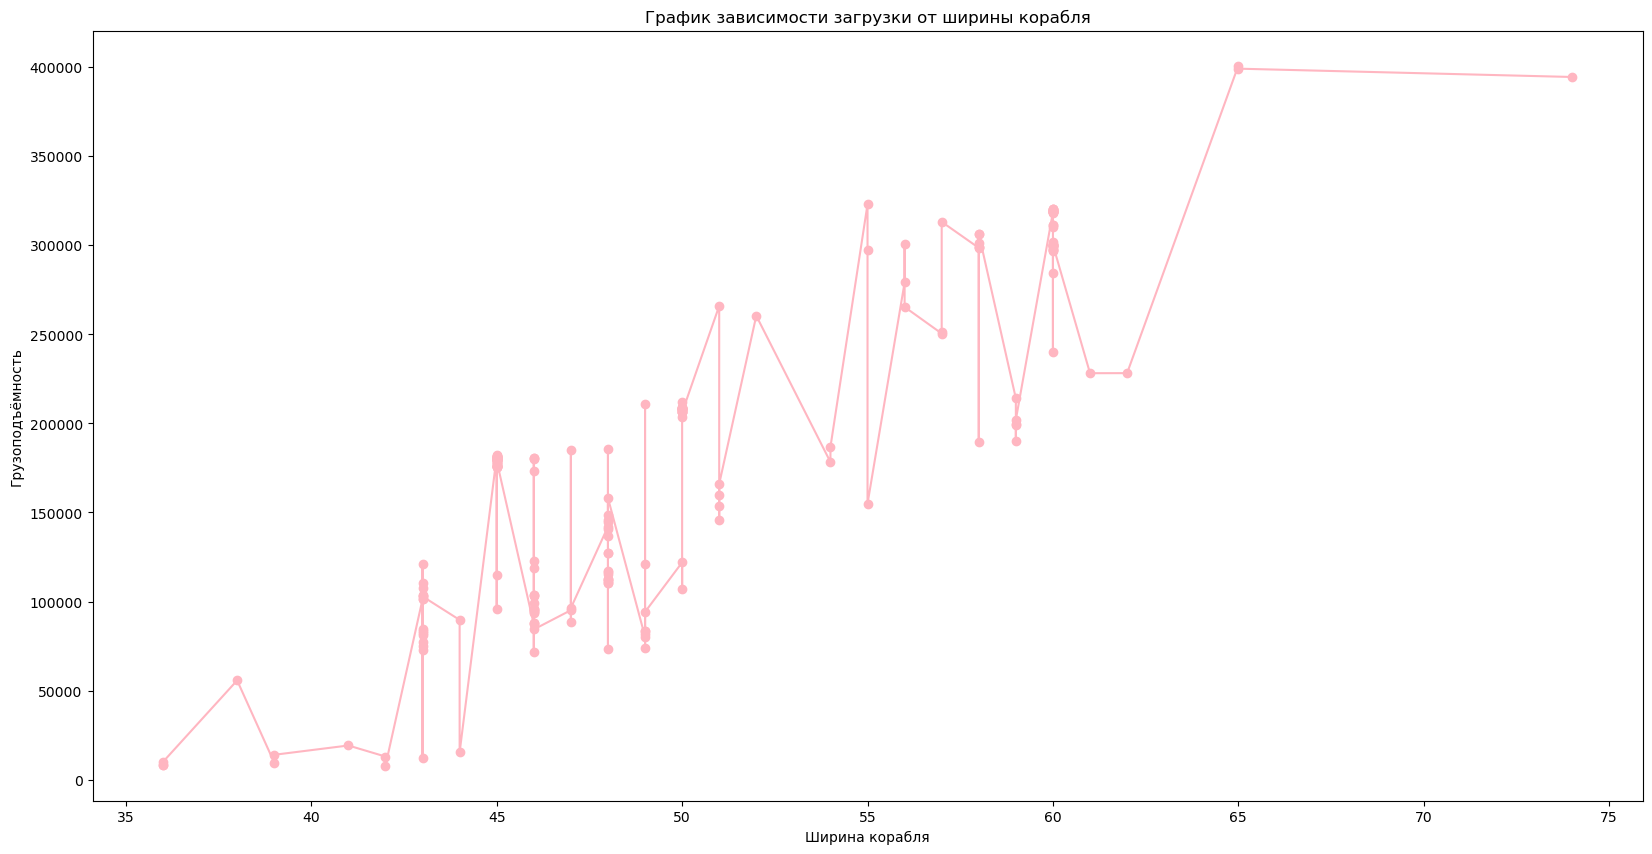

In [228]:
plt.figure(figsize=(20, 10))
plt.xlabel('Ширина корабля')
plt.ylabel('Грузоподъёмность')
plt.title('График зависимости загрузки от ширины корабля')
sorted_data = data.sort_values('width')
plt.plot(sorted_data.width, sorted_data.dwt, '-o', color='lightpink')
plt.show()

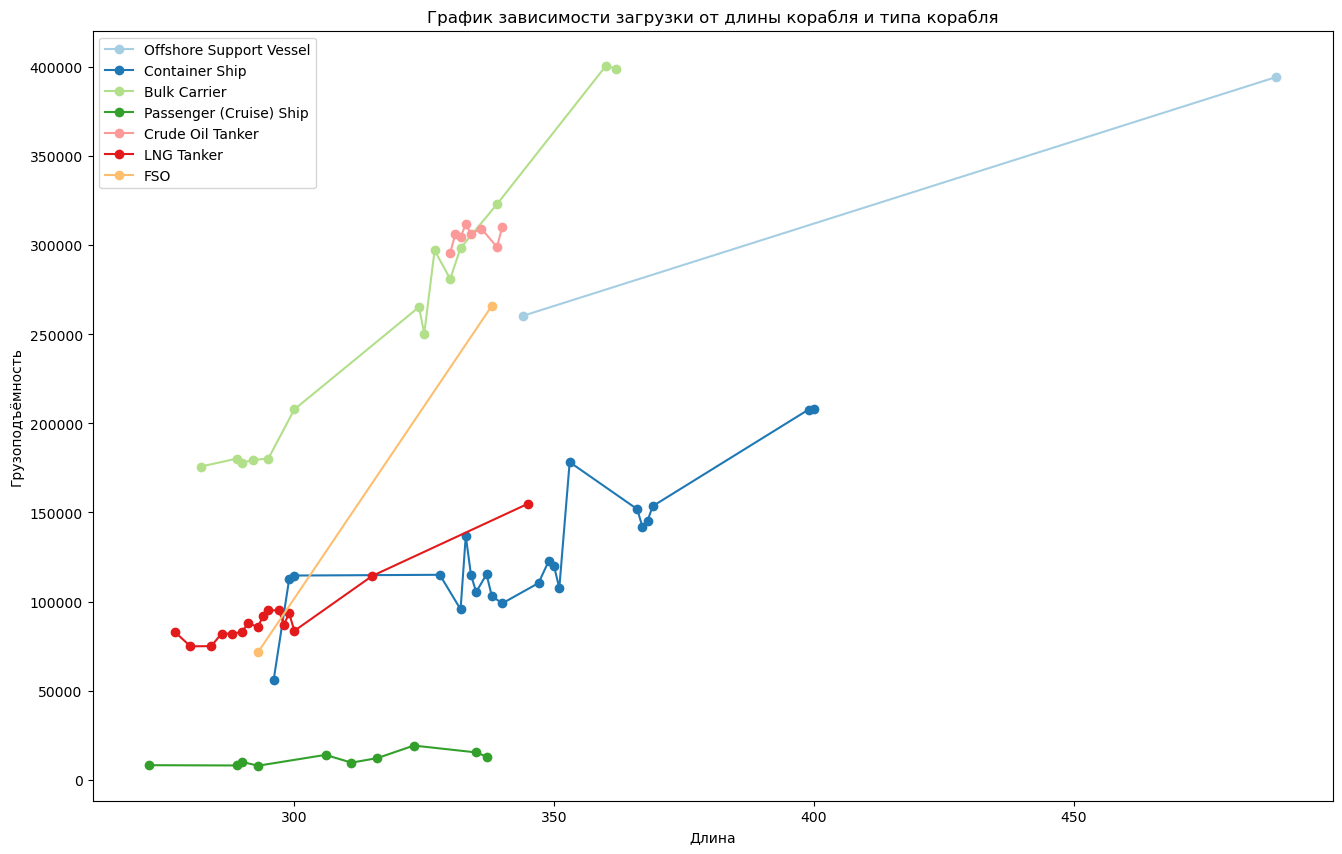

In [249]:
sns.set_palette(sns.color_palette('Paired', n_colors=10))
plt.figure(figsize=(16, 10))
plt.xlabel('Длина')
plt.ylabel('Грузоподъёмность')
plt.title('График зависимости загрузки от длины корабля и типа корабля')
names = data['ship_name'].unique()
for ship_type in names:
    subset = data[data['ship_name'] == ship_type]
    average_max_load = subset.groupby('length')['dwt'].mean()
    lengths = average_max_load.index.tolist()
    max_loads = average_max_load.tolist()
    plt.plot(lengths, max_loads, marker='o', label=ship_type)
dwt_data = data.groupby('ship_name')[['dwt']].mean()
plt.legend()
plt.show()

### Распределение количества кораблей по их типу (ship_name)

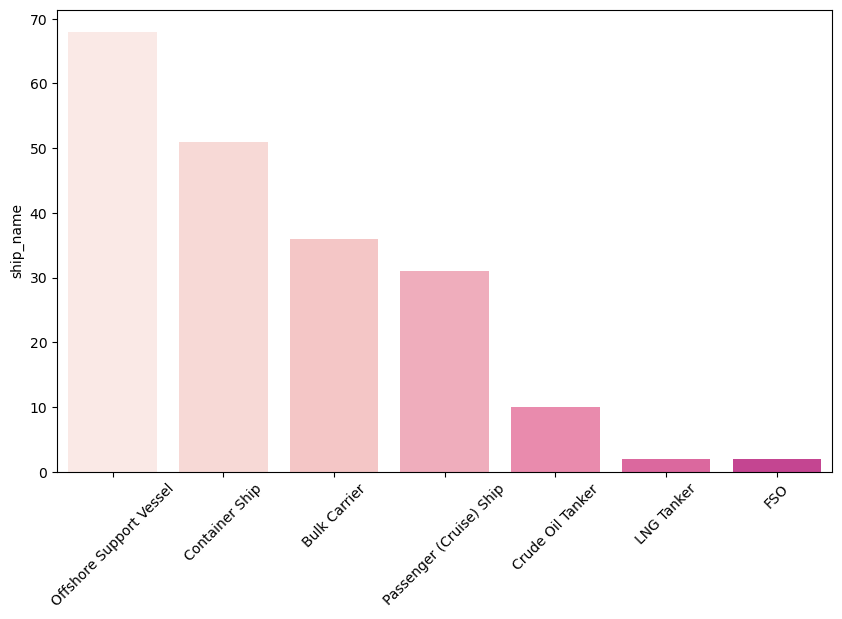

In [183]:
sns.set_palette(sns.color_palette('RdPu', n_colors=10))
plt.figure(figsize=(10, 6))
types = data['ship_name'].unique()
types_values = data['ship_name'].value_counts()
sns.barplot(x = types, y = types_values)
plt.xticks(rotation = 45)
plt.show()

### Гистограмма распределения количества кораблей по годам постройки 

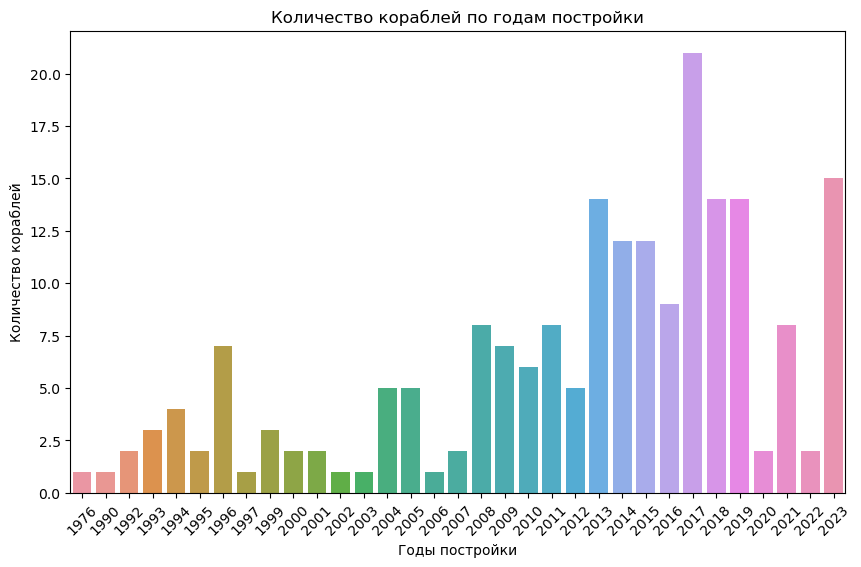

In [247]:
#sns.set_palette(sns.color_palette('Paired', n_colors=30))
years = data['built_year'].unique()
built_count = data['built_year'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=years, y=built_count)
plt.xlabel('Годы постройки')
plt.ylabel('Количество кораблей')
plt.title('Количество кораблей по годам постройки')
plt.xticks(rotation = 45)
plt.show()

### 2-D Гистограмма распределения количества кораблей по годам постройки (built_year) и максимальному весу груза (dwt)

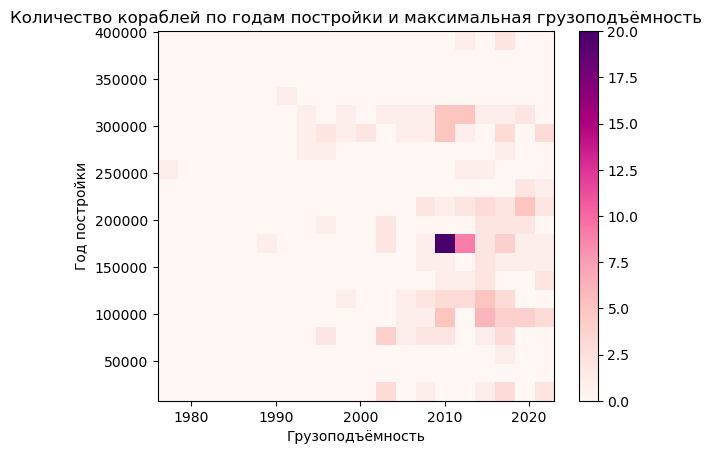

In [185]:
years_list = data.built_year
dwt_list = data.dwt
plt.hist2d(years_list, dwt_list, bins=[20,20], cmap='RdPu')
plt.xlabel('Грузоподъёмность')
plt.ylabel('Год постройки')
plt.title('Количество кораблей по годам постройки и максимальная грузоподъёмность')
plt.colorbar()
plt.show()

### Задание 1.2
### Считывание файла

In [186]:
file_path = 'C:/Users/Mi/Downloads/archive (3)/IRIS.csv'
if '.csv' in file_path and os.path.exists(file_path) == True:    
    data = pd.read_csv(file_path)
    if not(os.path.getsize(file_path) > 0 and data.isnull().values.any()):
        print(data.head(5))
    else:
        print('Походу, файл битый')
else:
    print('Файла не существует или он другого формата')


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


### Парная диаграмма (Pairplot) для датасета

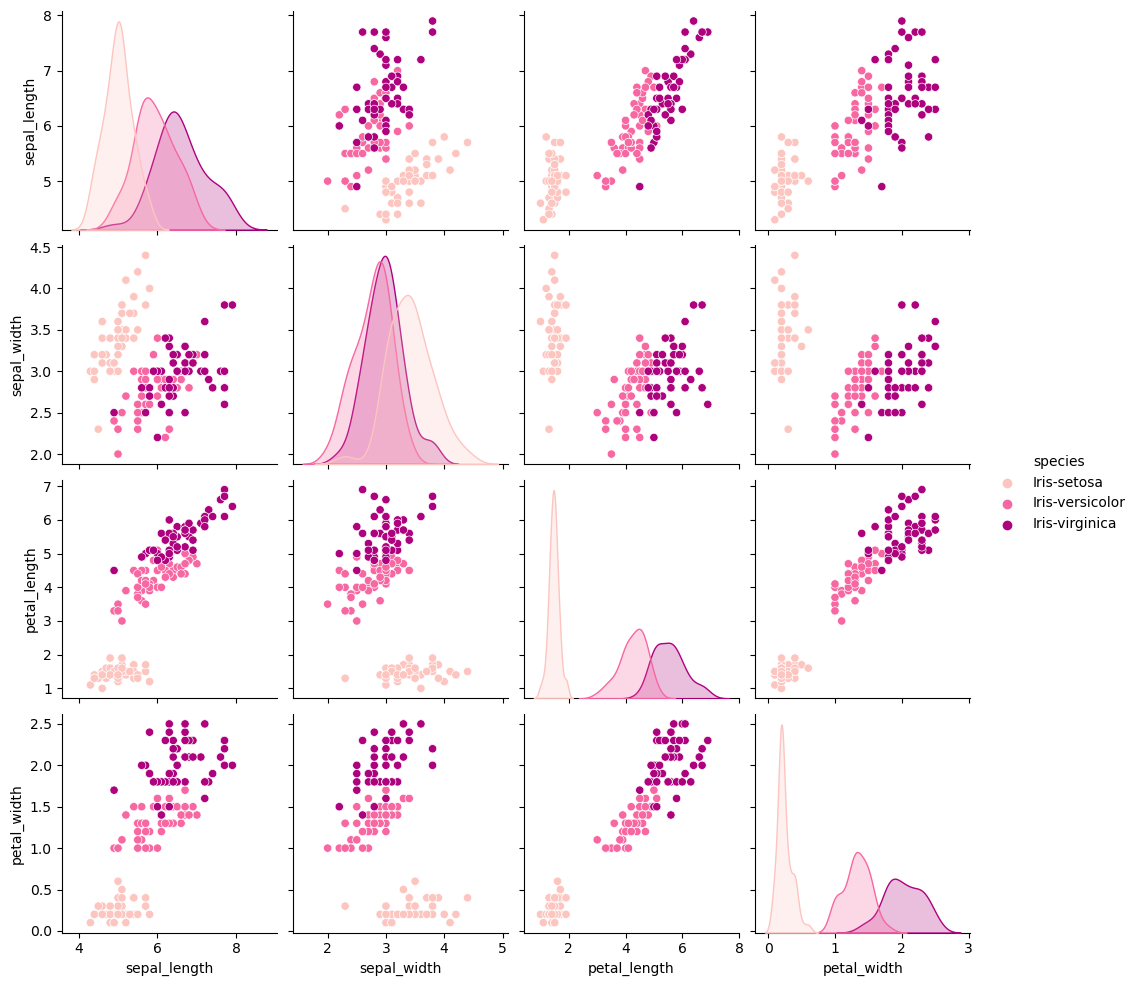

In [187]:
sns.pairplot(data, hue='species', palette='RdPu')
plt.show()

### Скрипичная диаграмма (Violinplot) с распределением всех четырех характеристик ирисов для каждого вида

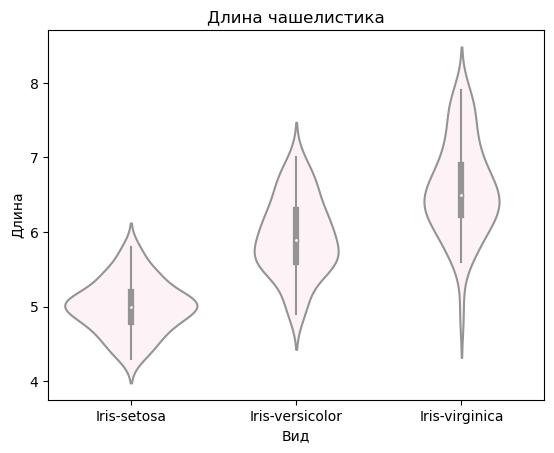

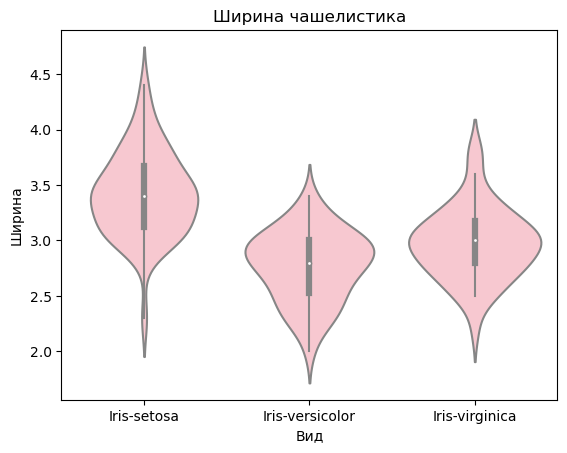

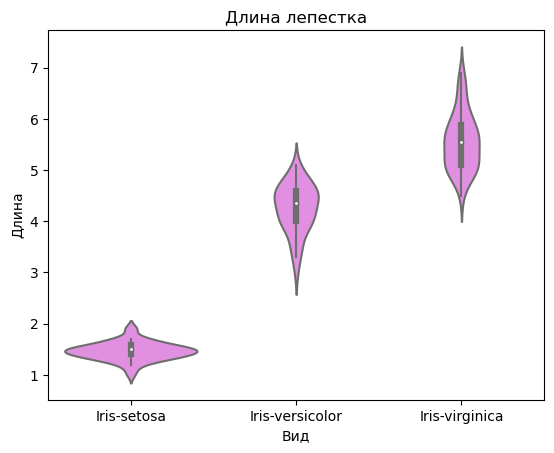

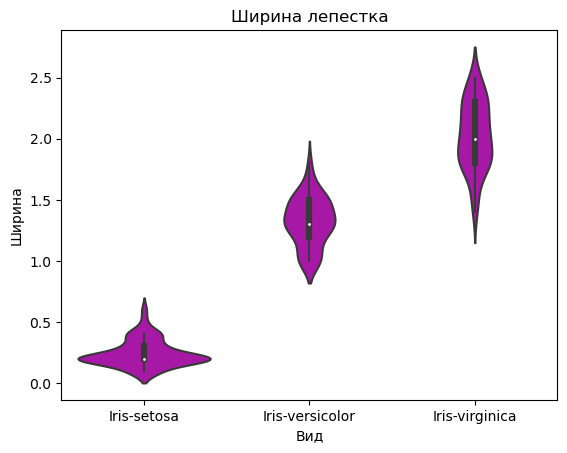

In [188]:
sns.violinplot(x='species', y='sepal_length', data=data, color='lavenderblush')
plt.title('Длина чашелистика')
plt.xlabel('Вид')
plt.ylabel('Длина')
plt.show()

sns.violinplot(x='species', y='sepal_width', data=data, color='pink')
plt.title('Ширина чашелистика')
plt.xlabel('Вид')
plt.ylabel('Ширина')
plt.show()

sns.violinplot(x='species', y='petal_length', data=data, color='violet')
plt.title('Длина лепестка')
plt.xlabel('Вид')
plt.ylabel('Длина')
plt.show()

sns.violinplot(x='species', y='petal_width', data=data, color='m')
plt.title('Ширина лепестка')
plt.xlabel('Вид')
plt.ylabel('Ширина')
plt.show()

### Задание 2

### Считывание файла

In [189]:
#ссылка для скачивания датасета https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
file_path = 'C:/Users/Mi/Downloads/archive (4)/StudentsPerformance.csv'
if '.csv' in file_path and os.path.exists(file_path) == True:    
    data = pd.read_csv(file_path)
    if not(os.path.getsize(file_path) > 0 and data.isnull().values.any()):
        print(data.head(10))
    else:
        print('Походу, файл битый')
else:
    print('Файла не существует или он другого формата')

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   
5  female        group B          associate's degree      standard   
6  female        group B                some college      standard   
7    male        group B                some college  free/reduced   
8    male        group D                 high school  free/reduced   
9  female        group B                 high school  free/reduced   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                  

### Влияние пола на успеваемость

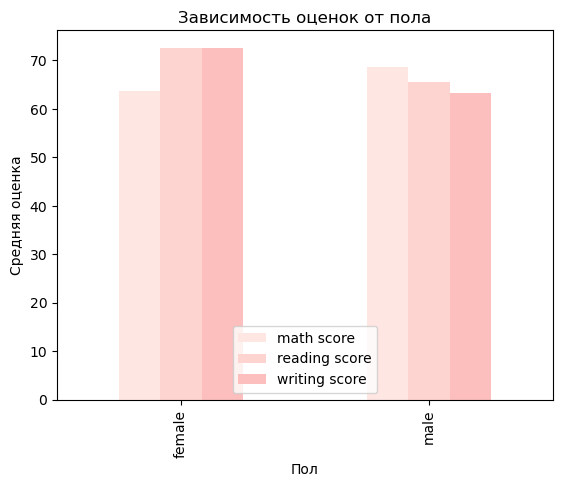

In [192]:
gender_scores = data.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
gender_scores.plot(kind='bar')
plt.title('Зависимость оценок от пола')
plt.xlabel('Пол')
plt.ylabel('Средняя оценка')
plt.show()

#### Вывод: у девочек по гуманитарным дисциплинам оценки выше, чем у мальчиков, по техническим - наоборот

### Влияние образования родителей на успеваемость

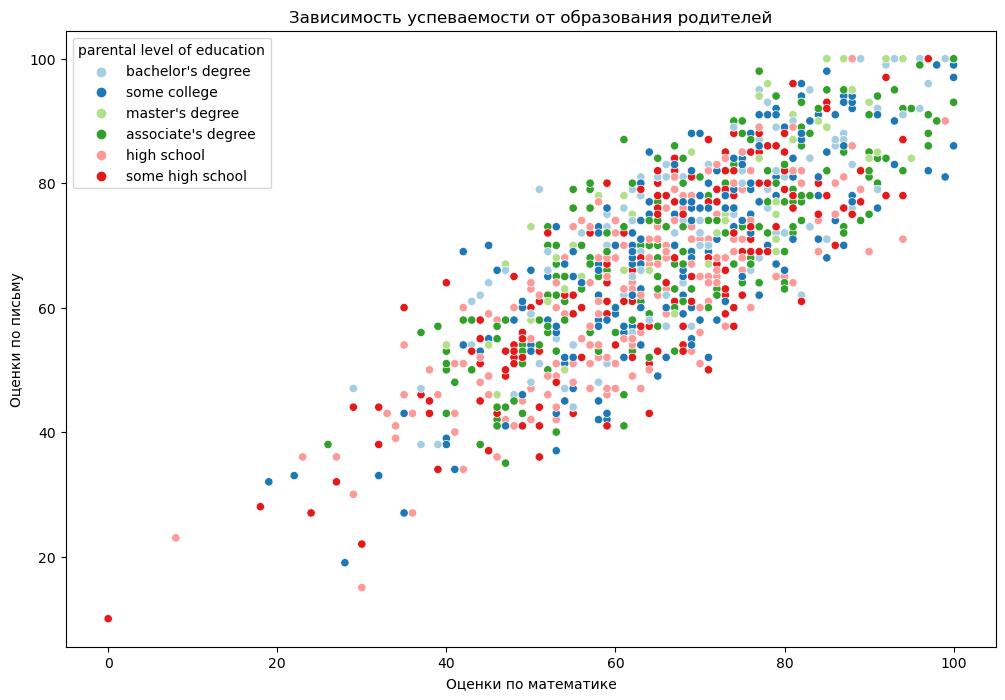

In [215]:
sns.set_palette(sns.color_palette('Paired', n_colors=10))
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='math score', y='writing score', hue='parental level of education')
plt.xlabel('Оценки по математике')
plt.ylabel('Оценки по письму')
plt.title('Зависимость успеваемости от образования родителей')
plt.legend(title='parental level of education')
plt.show()

#### Вывод: ученики, у которых родители имеют среднее профессиональное образование и выше, учатся лучше

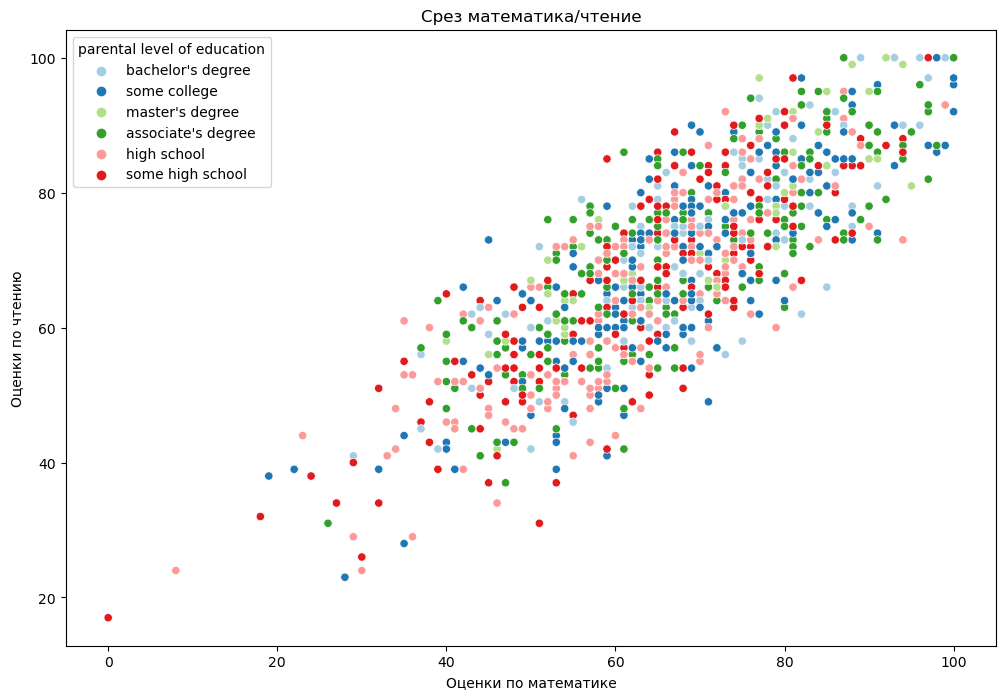

In [213]:
sns.set_palette(sns.color_palette('Paired', n_colors=10))
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='math score', y='reading score', hue='parental level of education')
plt.xlabel('Оценки по математике')
plt.ylabel('Оценки по чтению')
plt.title('Срез математика/чтение')
plt.legend(title='parental level of education')
plt.show()

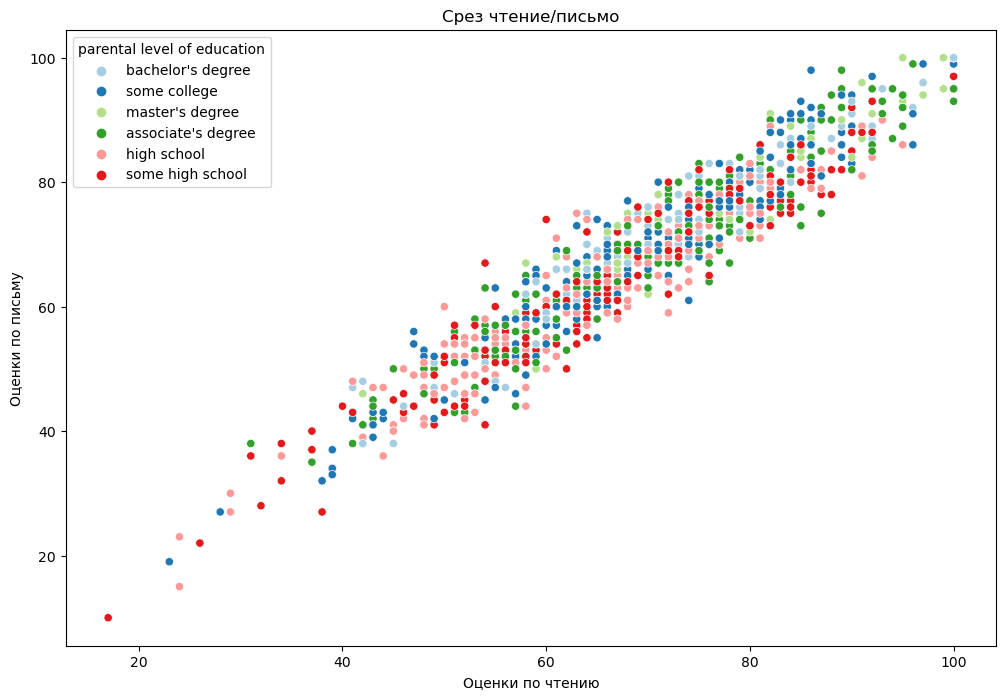

In [214]:
sns.set_palette(sns.color_palette('Paired', n_colors=10))
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='reading score', y='writing score', hue='parental level of education')
plt.xlabel('Оценки по чтению')
plt.ylabel('Оценки по письму')
plt.title('Срез чтение/письмо')
plt.legend(title='parental level of education')
plt.show()

#### Вывод: гипотеза подтвердилась, генетика работает

### Актуальность подготовительных курсов к тестам

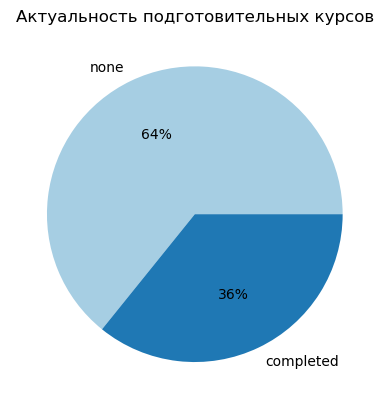

In [212]:
plt.pie(data['test preparation course'].value_counts(), labels=data['test preparation course'].unique(), autopct='%0.f%%')
plt.title('Актуальность подготовительных курсов')
plt.show()

#### Вывод: большое количество учеников обучаются на подготовительных курсах к школьным тестам